In [2]:
!pip install pystan

In [3]:
!pip install fbprophet

In [0]:
import pandas as pd
import numpy as np
from fbprophet import Prophet
import matplotlib.pyplot as plt
plt.style.use("fivethirtyeight")# for pretty graphs

In [5]:
from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/


In [6]:
df = pd.read_excel('/content/drive/My Drive/Colab Notebooks/COVID_Bangladesh-Cases.xlsx')
df.head()

,Date,Confirmed Cases
0,2020-03-08,3
1,2020-03-09,0
2,2020-03-10,0
3,2020-03-11,0
4,2020-03-12,0


In [7]:
df.dtypes

Date               datetime64[ns]
Confirmed Cases             int64
dtype: object

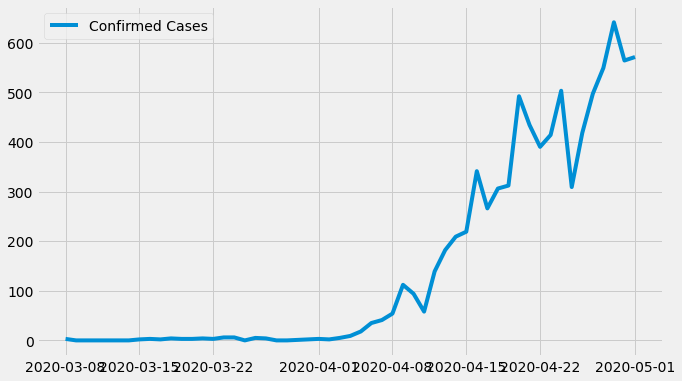

In [8]:
plt.figure(figsize=(10,6))
plt.plot(df.set_index('Date'))
plt.legend(['Confirmed Cases'])

In [9]:
df.columns = ['ds','y']
df.head()

,ds,y
0,2020-03-08,3
1,2020-03-09,0
2,2020-03-10,0
3,2020-03-11,0
4,2020-03-12,0


In [10]:
m1 = Prophet(daily_seasonality=True)
m1.fit(df)

INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


In [16]:
future1 = m1.make_future_dataframe(periods=7)
forecast1 = m1.predict(future1)
forecast1.tail().T

,57,58,59,60,61
ds,2020-05-04 00:00:00,2020-05-05 00:00:00,2020-05-06 00:00:00,2020-05-07 00:00:00,2020-05-08 00:00:00
trend,666.922,688.714,710.507,732.299,754.091
yhat_lower,617.919,632.273,652.447,678.431,689.089
yhat_upper,715.729,728.581,746.989,775.289,788.134
trend_lower,664.641,685.125,705.33,725.348,744.494
trend_upper,669.324,692.573,716.144,739.874,764.248
additive_terms,1.04552,-7.20708,-10.3397,-5.73281,-16.7355
additive_terms_lower,1.04552,-7.20708,-10.3397,-5.73281,-16.7355
additive_terms_upper,1.04552,-7.20708,-10.3397,-5.73281,-16.7355
daily,-17.2744,-17.2744,-17.2744,-17.2744,-17.2744


In [17]:
forecast1[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
57,2020-05-04,667.967784,617.919109,715.728698
58,2020-05-05,681.507336,632.272613,728.581158
59,2020-05-06,700.166829,652.447023,746.989326
60,2020-05-07,726.565919,678.431230,775.289381
61,2020-05-08,737.355426,689.088834,788.133649


In [18]:
np.exp(forecast1[['yhat', 'yhat_lower', 'yhat_upper']].tail())

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: RuntimeWarning:

overflow encountered in exp



,yhat,yhat_lower,yhat_upper
57,1.243721e+290,2.284858e+268,inf
58,9.437900e+295,3.912975e+274,inf
59,1.198369e+304,2.260175e+283,inf
60,inf,4.354513e+294,inf
61,inf,1.851306e+299,inf


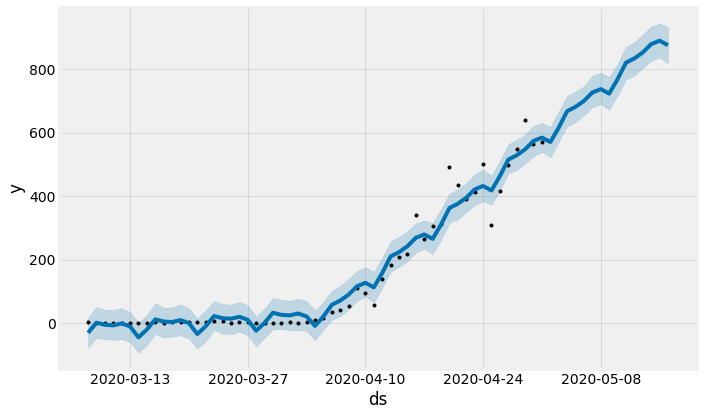

In [14]:
m1.plot(forecast1);

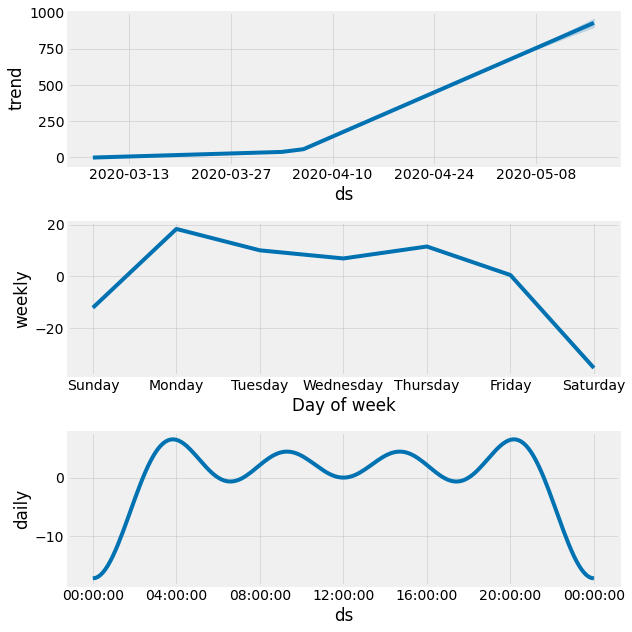

In [15]:
m1.plot_components(forecast1);